# Webscraping + Data Analysis (SEEK.com) Project


## Introduction

This project aims to provide an overview of the job market in Australia. In particular, it focuses on the Information Technology industry along with some of its metrics, including salary, job satisfaction, work-life balance. The data used to support our analysis is collected from SEEK.com. This website is chosen because it is one of the largest job searching platforms in Australia, which will allow us to reliably capture various aspects of job markets in Australia. 

### I. Data Collection
Data from seek.com was manually scraped using selenium and by requesting directly from seek's API. 
Please refer to the code python file main.py for more details. 

NOTE: During scraping, we also decided on how we wanted to store and organise data. Therefore, parts of data cleaning and processing have already been completed prior to next step.


### II. Data exploration

#### A. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = "white")

#### B. Read csv files

After scrapping from SEEK website, the data is stored in 5 different tables. Here we load all 5 tables and observe how the data looks like. 

In [3]:
jobOverview = pd.read_csv("jobOverview.csv")
jobCounts = pd.read_csv("jobCounts.csv")
reviewStats = pd.read_csv("reviewStats.csv")
similarRoles = pd.read_csv("similarRoles.csv")
specReqs = pd.read_csv("specReq.csv")

In [4]:
jobOverview.head()

,Unnamed: 0,id,role_id,alias,title,roleReviewStatistics,growth,industry,salarySuggestion.locationName,salarySuggestion.suggestion.min,salarySuggestion.suggestion.max,salarySuggestion.salary_min,salarySuggestion.salary_max,salarySuggestion.salary_median,salarySuggestion.__typename,roleReviewStatistics.jobSatisfaction,roleReviewStatistics.__typename,growth.value,growth.__typename,salarySuggestion
0,0,insolvency-manager,insolvency-manager,insolvency-manager,Insolvency Manager,NaN,NaN,accounting,Australia,100000.0,160000.0,120000.0,140000.0,123749.0,SalarySuggestion,NaN,NaN,NaN,NaN,NaN
1,1,payroll-adviser,payroll-adviser,payroll-adviser,Payroll Adviser,NaN,NaN,accounting,Australia,70000.0,115000.0,85000.0,100000.0,94264.0,SalarySuggestion,NaN,NaN,NaN,NaN,NaN
2,2,taxation-manager,taxation-manager,taxation-manager,Taxation Manager,NaN,NaN,accounting,Australia,110000.0,170000.0,130000.0,150000.0,139697.0,SalarySuggestion,1.0,RoleReviewStats,NaN,NaN,NaN
3,3,taxation-consultant,taxation-consultant,taxation-consultant,Taxation Consultant,NaN,NaN,accounting,Australia,65000.0,125000.0,85000.0,105000.0,92500.0,SalarySuggestion,4.1,RoleReviewStats,9.2,Growth,NaN
4,4,audit-supervisor,audit-supervisor,audit-supervisor,Audit Supervisor,NaN,NaN,accounting,Australia,85000.0,115000.0,95000.0,105000.0,100000.0,SalarySuggestion,5.0,RoleReviewStats,NaN,NaN,NaN


In [5]:
jobCounts.head()

,Unnamed: 0,title,location,work_type,job counts
0,0,Taxation Consultant,New South Wales NSW,Full time,100
1,1,Insolvency Manager,New South Wales NSW,Full time,100
2,2,Account Administration Assistant,New South Wales NSW,Full time,116
3,3,Tax Agent,New South Wales NSW,Full time,429
4,4,Payroll Adviser,New South Wales NSW,Full time,100


In [6]:
reviewStats.head()

,Unnamed: 0,alias,total,remuneration,employability,jobSatisfaction,workLifeBalance,diversityInTasks,careerProgressionOpportunities,__typename
0,0,insolvency-manager,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,payroll-adviser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,taxation-manager,1.0,3.0,3.0,1.0,4.0,3.0,1.0,RoleReviewStats
3,3,taxation-consultant,17.0,3.2,3.3,4.1,4.3,3.5,3.7,RoleReviewStats
4,4,audit-supervisor,2.0,3.5,4.0,5.0,4.0,4.0,5.0,RoleReviewStats


In [7]:
similarRoles.head()

,Unnamed: 0,role_id,primary_alias
0,0,taxation-accountant,tax-agent
1,1,business-services-accountant,tax-agent
2,2,taxation-consultant,tax-agent
3,3,accountant,tax-agent
4,4,company-accountant,tax-agent


In [8]:
specReqs.head()

,Unnamed: 0,type,label,alias
0,0,Referenceable Experience,Insolvency,insolvency-manager
1,1,Referenceable Experience,Restructuring,insolvency-manager
2,2,Observable Attributes,Assertive Communication,insolvency-manager
3,3,Referenceable Experience,Relationship Management,insolvency-manager
4,4,Referenceable Experience,Public Practice Accounting,insolvency-manager


#### C. Cleaning and EDA

##### i. Overview of Jobs

In [9]:
jobOverview

,Unnamed: 0,id,role_id,alias,title,roleReviewStatistics,growth,industry,salarySuggestion.locationName,salarySuggestion.suggestion.min,salarySuggestion.suggestion.max,salarySuggestion.salary_min,salarySuggestion.salary_max,salarySuggestion.salary_median,salarySuggestion.__typename,roleReviewStatistics.jobSatisfaction,roleReviewStatistics.__typename,growth.value,growth.__typename,salarySuggestion
0,0,insolvency-manager,insolvency-manager,insolvency-manager,Insolvency Manager,NaN,NaN,accounting,Australia,100000.0,160000.0,120000.0,140000.0,123749.0,SalarySuggestion,NaN,NaN,NaN,NaN,NaN
1,1,payroll-adviser,payroll-adviser,payroll-adviser,Payroll Adviser,NaN,NaN,accounting,Australia,70000.0,115000.0,85000.0,100000.0,94264.0,SalarySuggestion,NaN,NaN,NaN,NaN,NaN
2,2,taxation-manager,taxation-manager,taxation-manager,Taxation Manager,NaN,NaN,accounting,Australia,110000.0,170000.0,130000.0,150000.0,139697.0,SalarySuggestion,1.0,RoleReviewStats,NaN,NaN,NaN
3,3,taxation-consultant,taxation-consultant,taxation-consultant,Taxation Consultant,NaN,NaN,accounting,Australia,65000.0,125000.0,85000.0,105000.0,92500.0,SalarySuggestion,4.1,RoleReviewStats,9.2,Growth,NaN
4,4,audit-supervisor,audit-supervisor,audit-supervisor,Audit Supervisor,NaN,NaN,accounting,Australia,85000.0,115000.0,95000.0,105000.0,100000.0,SalarySuggestion,5.0,RoleReviewStats,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,2575,general-hand,general-hand,general-hand,General Hand,NaN,NaN,trades-services,Australia,55000.0,70000.0,60000.0,65000.0,60371.0,SalarySuggestion,4.0,RoleReviewStats,NaN,NaN,NaN
2576,2576,maintenance-manager,maintenance-manager,maintenance-manager,Maintenance Manager,NaN,NaN,trades-services,Australia,95000.0,155000.0,115000.0,135000.0,124999.0,SalarySuggestion,4.0,RoleReviewStats,NaN,NaN,NaN
2577,2577,furniture-removalist,furniture-removalist,furniture-removalist,Furniture Removalist,NaN,NaN,trades-services,Australia,40000.0,85000.0,55000.0,70000.0,59999.0,SalarySuggestion,3.9,RoleReviewStats,0.7,Growth,NaN
2578,2578,engineering-technician,engineering-technician,engineering-technician,Engineering Technician,NaN,NaN,trades-services,Australia,60000.0,120000.0,80000.0,100000.0,90000.0,SalarySuggestion,4.7,RoleReviewStats,NaN,NaN,NaN


In [10]:
jobOverview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            2580 non-null   int64  
 1   id                                    2580 non-null   object 
 2   role_id                               2580 non-null   object 
 3   alias                                 2580 non-null   object 
 4   title                                 2580 non-null   object 
 5   roleReviewStatistics                  0 non-null      float64
 6   growth                                0 non-null      float64
 7   industry                              2580 non-null   object 
 8   salarySuggestion.locationName         2384 non-null   object 
 9   salarySuggestion.suggestion.min       2384 non-null   float64
 10  salarySuggestion.suggestion.max       2384 non-null   float64
 11  salarySuggestion.

> Based on the summary, we can see that some of the columns have some missing values, which we might need to pay attention to later on, including: Median Salary and Growth Value. Notably, some columns even contain no information at all (growth, roleReviewStatistics and salarySuggestion), which is expected. While this empty columns could be removed during scrapping process, it is kept because it is much easier to do it at this cleaning step. Now, we will perform a series of cleaning steps for this table. 

Here are the names of the columns:

In [11]:
jobOverview.columns

Index(['Unnamed: 0', 'id', 'role_id', 'alias', 'title', 'roleReviewStatistics',
       'growth', 'industry', 'salarySuggestion.locationName',
       'salarySuggestion.suggestion.min', 'salarySuggestion.suggestion.max',
       'salarySuggestion.salary_min', 'salarySuggestion.salary_max',
       'salarySuggestion.salary_median', 'salarySuggestion.__typename',
       'roleReviewStatistics.jobSatisfaction',
       'roleReviewStatistics.__typename', 'growth.value', 'growth.__typename',
       'salarySuggestion'],
      dtype='object')

In [12]:
jobOverview[jobOverview['role_id']!= jobOverview['alias']]

,Unnamed: 0,id,role_id,alias,title,roleReviewStatistics,growth,industry,salarySuggestion.locationName,salarySuggestion.suggestion.min,salarySuggestion.suggestion.max,salarySuggestion.salary_min,salarySuggestion.salary_max,salarySuggestion.salary_median,salarySuggestion.__typename,roleReviewStatistics.jobSatisfaction,roleReviewStatistics.__typename,growth.value,growth.__typename,salarySuggestion
220,220,Museum-Curator,Museum-Curator,museum-curator,Museum Curator,NaN,NaN,advertising-arts-media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,Growth,NaN
631,631,Zoologist,Zoologist,zoologist,Zoologist,NaN,NaN,consulting-strategy,Australia,75000.0,135000.0,95000.0,115000.0,105000.0,SalarySuggestion,4.0,RoleReviewStats,3.4,Growth,NaN
1023,1023,dietician,dietician,dietitian,Dietitian,NaN,NaN,healthcare-medical,Australia,60000.0,120000.0,80000.0,100000.0,90000.0,SalarySuggestion,3.9,RoleReviewStats,7.2,Growth,NaN
1419,1419,.net-software-developer,.net-software-developer,dot-net-software-developer,.Net Developer,NaN,NaN,information-communication-technology,Australia,90000.0,150000.0,110000.0,130000.0,120000.0,SalarySuggestion,4.0,RoleReviewStats,27.0,Growth,NaN
1780,1780,truckdriver,truckdriver,truck-driver,Truck Driver,NaN,NaN,manufacturing-transport-logistics,Australia,45000.0,105000.0,65000.0,85000.0,75000.0,SalarySuggestion,4.0,RoleReviewStats,1.1,Growth,NaN
2165,2165,Herbalist,Herbalist,herbalist,Herbalist,NaN,NaN,retail-consumer-products,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,RoleReviewStats,27.9,Growth,NaN
2404,2404,"heating,-ventilation-and-air-conditioning-tech...","heating,-ventilation-and-air-conditioning-tech...",heating-ventilation-and-air-conditioning-techn...,"Heating, Ventilation and Air Conditioning Tech...",NaN,NaN,trades-services,Australia,75000.0,120000.0,90000.0,105000.0,100000.0,SalarySuggestion,3.6,RoleReviewStats,NaN,NaN,NaN


> It is observed that some columns store the same information: id, role_id, alias. Hence, it is not necessary to keep all of them. By checking where the mismatch between role_id and alias is, we can see that alias does have a consistent formatting of the role title while role_id or id used capitalised letters in some of their values instead. Plus, alias is also used in other tables. Hence, we will keep alias column and drop the other two. 

Dropping some columns that are not important nor containing nothing

In [13]:
jobOverview_droppedcols = ['Unnamed: 0', 'id','role_id', 'roleReviewStatistics', 'growth', 'salarySuggestion.locationName', 'salarySuggestion.__typename',
                           'roleReviewStatistics.__typename','growth.__typename', 'salarySuggestion']

In [14]:
jobOverview.drop(jobOverview_droppedcols, axis = 1, inplace = True)

Renaming the columns so that it is more readable

In [15]:
jobOverview_new_columns = {'salarySuggestion.suggestion.min':'minSalary', 'salarySuggestion.suggestion.max':'maxSalary', 
                           'salarySuggestion.salary_min':'lowerAverageSalary', 'salarySuggestion.salary_max':'upperAverageSalary',
                           'salarySuggestion.salary_median':'medianSalary','roleReviewStatistics.jobSatisfaction':'jobStatisfaction',
                            'growth.value':'growth'}

In [16]:
jobOverview.rename(columns = jobOverview_new_columns, inplace =True)

Here is the jobOverview table after cleaning

In [17]:
jobOverview

,alias,title,industry,minSalary,maxSalary,lowerAverageSalary,upperAverageSalary,medianSalary,jobStatisfaction,growth
0,insolvency-manager,Insolvency Manager,accounting,100000.0,160000.0,120000.0,140000.0,123749.0,NaN,NaN
1,payroll-adviser,Payroll Adviser,accounting,70000.0,115000.0,85000.0,100000.0,94264.0,NaN,NaN
2,taxation-manager,Taxation Manager,accounting,110000.0,170000.0,130000.0,150000.0,139697.0,1.0,NaN
3,taxation-consultant,Taxation Consultant,accounting,65000.0,125000.0,85000.0,105000.0,92500.0,4.1,9.2
4,audit-supervisor,Audit Supervisor,accounting,85000.0,115000.0,95000.0,105000.0,100000.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2575,general-hand,General Hand,trades-services,55000.0,70000.0,60000.0,65000.0,60371.0,4.0,NaN
2576,maintenance-manager,Maintenance Manager,trades-services,95000.0,155000.0,115000.0,135000.0,124999.0,4.0,NaN
2577,furniture-removalist,Furniture Removalist,trades-services,40000.0,85000.0,55000.0,70000.0,59999.0,3.9,0.7
2578,engineering-technician,Engineering Technician,trades-services,60000.0,120000.0,80000.0,100000.0,90000.0,4.7,NaN


Checking if the job title appears multiple times in our data

In [18]:
jobOverview.groupby(by = 'title').alias.count().sort_values()

title
.Net Developer           1
Pathologist              1
Parts Supervisor         1
Parts Manager            1
Parts Interpreter        1
                        ..
Evaluation Manager       3
Promotions Manager       3
Programme Coordinator    3
Technical Manager        4
Assessment Manager       4
Name: alias, Length: 2156, dtype: int64

> It appears that the same job title could appear multiple times. For example, the title Assessment Manager can appear in 4 different industries. This does make sense, especially for manager positions, since they could exist in any type of industry

Checking how many job titles that have data for both job satisfaction and growth metrics.

In [19]:
jobOverview[(jobOverview['jobStatisfaction'].isnull() == False) & (jobOverview['growth'].isnull() == False)]

,alias,title,industry,minSalary,maxSalary,lowerAverageSalary,upperAverageSalary,medianSalary,jobStatisfaction,growth
3,taxation-consultant,Taxation Consultant,accounting,65000.0,125000.0,85000.0,105000.0,92500.0,4.1,9.2
5,tax-agent,Tax Agent,accounting,70000.0,115000.0,85000.0,100000.0,93724.0,5.0,9.2
7,taxation-adviser,Taxation Adviser,accounting,80000.0,140000.0,100000.0,120000.0,110000.0,3.0,9.2
13,financial-accountant,Financial Accountant,accounting,80000.0,125000.0,95000.0,110000.0,102500.0,3.7,9.2
14,payroll-officer,Payroll Officer,accounting,60000.0,105000.0,75000.0,90000.0,82500.0,3.9,4.9
...,...,...,...,...,...,...,...,...,...,...
2565,electrical-estimator,Electrical Estimator,trades-services,90000.0,150000.0,110000.0,130000.0,118750.0,3.6,0.7
2570,pastrychef,Pastry Chef,trades-services,55000.0,85000.0,65000.0,75000.0,67500.0,4.0,2.9
2572,telecommunications-technician,Telecommunications Technician,trades-services,55000.0,115000.0,75000.0,95000.0,85000.0,3.5,17.2
2573,massage-therapist,Massage Therapist,trades-services,50000.0,80000.0,60000.0,70000.0,62500.0,4.4,20.6


Checking the number of different job titles in each industry!

In [23]:
jobOverview.groupby(by="industry").title.count().sort_values(ascending = False)

industry
information-communication-technology    302
trades-services                         229
manufacturing-transport-logistics       213
healthcare-medical                      179
marketing-communications                126
administration-office-support           123
community-services-development          117
education-training                      107
mining-resources-energy                  94
accounting                               93
banking-financial-services               93
construction                             91
hospitality-tourism                      90
engineering                              86
sales                                    76
human-resources-recruitment              73
retail-consumer-products                 61
call-centre-customer-service             61
consulting-strategy                      51
advertising-arts-media                   45
real-estate-property                     44
design-architecture                      43
insurance-superannuatio

In [25]:
# growth = jobOverview['growth'].fillna(value = 0)

Showing the distribution of growth rate projection

/Users/kyphongmai/Documents/Projects/Webscraping/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


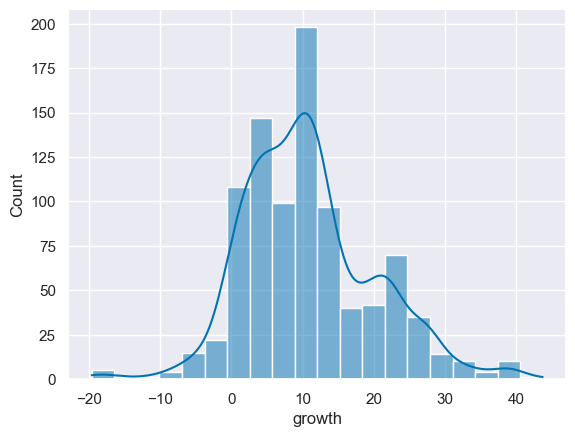

In [26]:
sns.set_theme(style = "darkgrid", palette="colorblind")
sns.histplot(data=jobOverview, x = "growth", bins = 20, kde = True)
sns.despine(left = True)

> It appears that majority of the growth rate is in the postive region of the plot, which is a good sign for the job market, indicating that most of the jobs are growing in the next 5 years. However, there are some job titles that have negative project rate of around -20%. It might be interesting to check out what these kinds of job are!

Displaying top 20 job titles with the lowest growth rate

In [27]:
jobOverview.sort_values(by='growth').head(20)

,alias,title,industry,minSalary,maxSalary,lowerAverageSalary,upperAverageSalary,medianSalary,jobStatisfaction,growth
1669,legal-secretary,Legal Secretary,legal,55000.0,100000.0,70000.0,85000.0,77500.0,3.9,-19.6
142,secretary,Secretary,administration-office-support,50000.0,110000.0,70000.0,90000.0,77500.0,3.8,-19.6
358,banker,Banker,call-centre-customer-service,135000.0,195000.0,155000.0,175000.0,165000.0,3.3,-17.6
297,bank-teller,Bank Teller,banking-financial-services,25000.0,55000.0,35000.0,45000.0,39999.0,3.5,-17.6
408,bank-teller,Bank Teller,call-centre-customer-service,25000.0,55000.0,35000.0,45000.0,39999.0,3.5,-17.6
1192,travel-consultant,Travel Agent,hospitality-tourism,50000.0,80000.0,60000.0,70000.0,62500.0,3.6,-13.6
2437,picture-framer,Picture Framer,trades-services,45000.0,60000.0,50000.0,55000.0,54999.0,4.0,-11.0
1675,legal-assistant,Legal Assistant,legal,55000.0,100000.0,70000.0,85000.0,80000.0,3.6,-9.5
2036,geologist,Geologist,mining-resources-energy,90000.0,150000.0,110000.0,130000.0,120000.0,3.9,-8.2
2333,geophysicist,Geophysicist,science-technology,65000.0,125000.0,85000.0,105000.0,97687.0,3.7,-8.2


> We can see that jobs like secretary (-19.6%), banker (-17.6%), bank-teller(-17.6%) will face a lot of difficulties in the near future. In some cases, it is possible that these jobs might disappear and be replaced by AI. With the rising of generative AI, chatbot like chatGPT can easily perform the tasks with good accuracy and much shoter time.  

In [29]:
# growth_values = jobOverview.groupby(by = "industry").growth.mean().sort_values(ascending= False).values

In [ ]:
# import matplotlib.colors as colors
# from matplotlib import cm
# norm = colors.CenteredNorm(vcenter = 10)
# values = norm(jobOverview.groupby(by="industry").growth.mean().sort_values(ascending = False))
# cmap = cm.coolwarm(values)

# fig, ax = plt.subplots(figsize=(10, 10))
# ax.axvline(x = 10, linestyle = '--', color ='black', alpha = 0.2)
# ax = sns.barplot(jobOverview, x = "growth", y = "industry",errorbar = None, 
#             order = jobOverview.groupby(by="industry").growth.mean().sort_values(ascending = False).index,
#             palette = cmap)

# max_val = jobOverview.groupby(by="industry").growth.mean().max()
# ax.figure.colorbar(mappable = cm.ScalarMappable(cmap="coolwarm", 
#                                                 norm = plt.Normalize(-1.2, max_val)),
#                     cmap = "coolwarm",
#                     ax = ax)

# ax.bar_label(ax.containers[0], fmt = '%.1f%%',padding =2, fontsize = 11)
# ax.set_xlim(-3,25)
# ax.set_xlabel("Average growth percentage by career fields")

In [31]:
average_growth = jobOverview.groupby(by="industry").growth.mean().mean()

~~~
Key highlights
~~~

In [32]:
sns.set_theme(style = "white")

Text(0.5, 1.0, '5 year Growth Projection for each career field ')

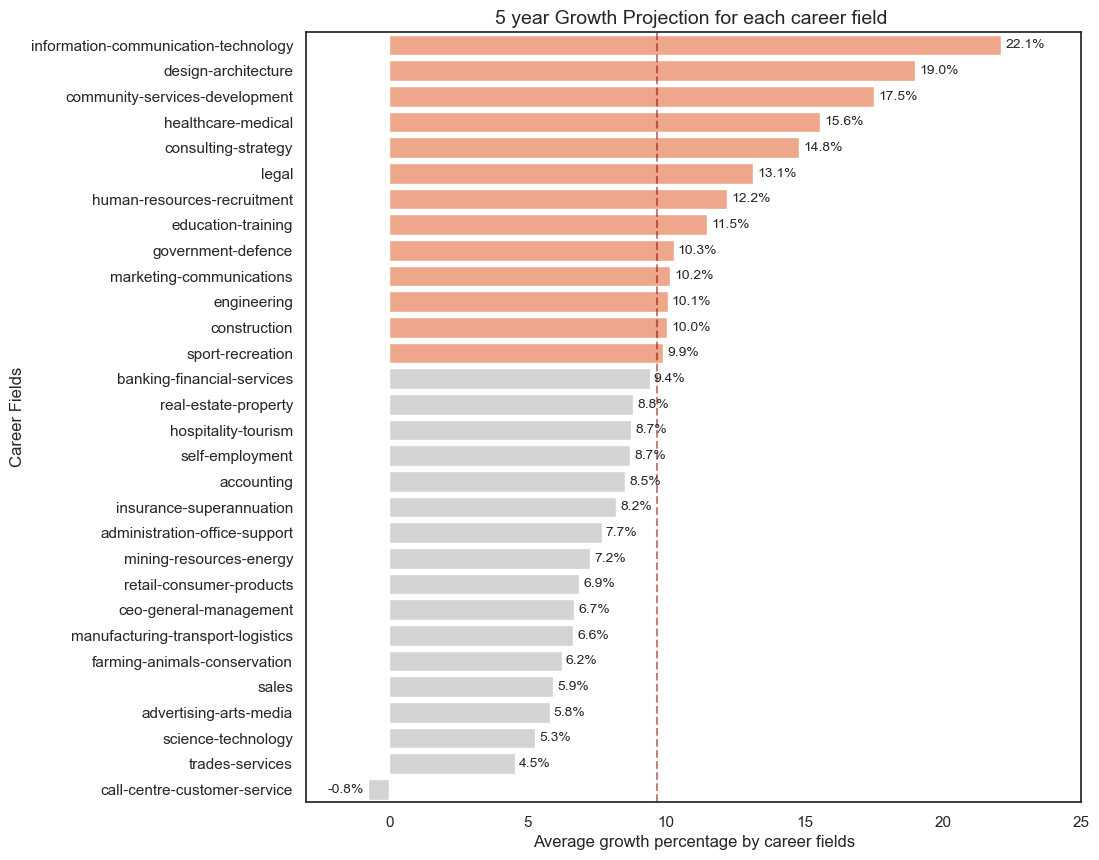

In [33]:
import matplotlib.colors as colors
from matplotlib import cm


fig, ax = plt.subplots(figsize=(10, 10))
ax.axvline(x = average_growth, linestyle = '--', color ='darkred', alpha = 0.5)

color_divider= ['lightsalmon' if x >=average_growth else 'lightgrey' for x in growth_values ]
ax = sns.barplot(jobOverview, x = "growth", y = "industry",errorbar = None, 
            order = jobOverview.groupby(by="industry").growth.mean().sort_values(ascending = False).index,
            palette = color_divider)



ax.bar_label(ax.containers[0], fmt = '%.1f%%',padding =3, fontsize = 10)
ax.set_xlim(-3,25)
ax.set_xlabel("Average growth percentage by career fields")
ax.set_ylabel("Career Fields")
#legend_divider = ['Above Average' if x >=average_growth else 'Below Average' for x in growth_values ]
ax.set_title ("5 year Growth Projection for each career field ", fontsize = 14)



> The image shows the mean growth percentage by career fields. The orange color displays fields which have growth rate higher than the average and the grey color indicates below average growth rate. We have a total of 30 career fields, and 29 of which have positive outlook on career project rate. Only "call centre & customer service" experienced a negative rate of -0.8%. This is expected since jobs in this field tend to be replaced by AI in the future. We can also notice ICT being the career with the highest growth rate of 22.1%, which is unsurprising. Another observation is that when we look at the orange color bar, we can notice some familar professions, such as health care, education, engineering. This indicates a growing demand in these kinds of profession, which also align with the migration direction of the government of Australia.

Text(0, 0.5, 'Career Fields')

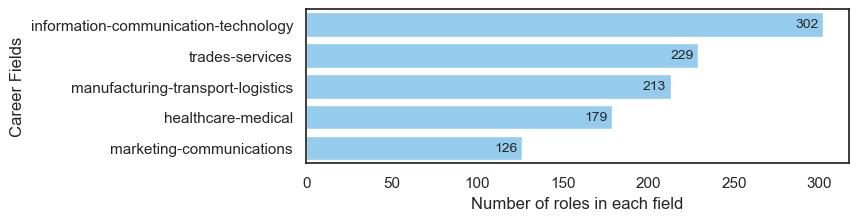

In [34]:
roles_per_industry = jobOverview.groupby(by="industry").alias.count().sort_values(ascending = False).reset_index()
fig, ax = plt.subplots(figsize=(7, 2))

#ax.axvline(x = average_roles_number, linestyle = '--', color ='darkred', alpha = 0.5)
ax = sns.barplot(roles_per_industry[:5], x = "alias", y = "industry",errorbar = None, color = 'lightskyblue')
ax.bar_label(ax.containers[0], fmt = '%.f',padding =-20, fontsize = 10)
ax.set_xlabel("Number of roles in each field")
ax.set_ylabel("Career Fields")


> The bar chart shows the number of job titles per career fields, which can be understood as a proxy for how diverse the field can be. Again, ICT industry ranked number 1 in this. However, when observing the 1st runner up in this category, which is the "trades-service" industry, we can see that even though it has many different roles, the growth is only 4.5% (shown in previous plot). 

Text(0.5, 0, 'Average salary by career fields')

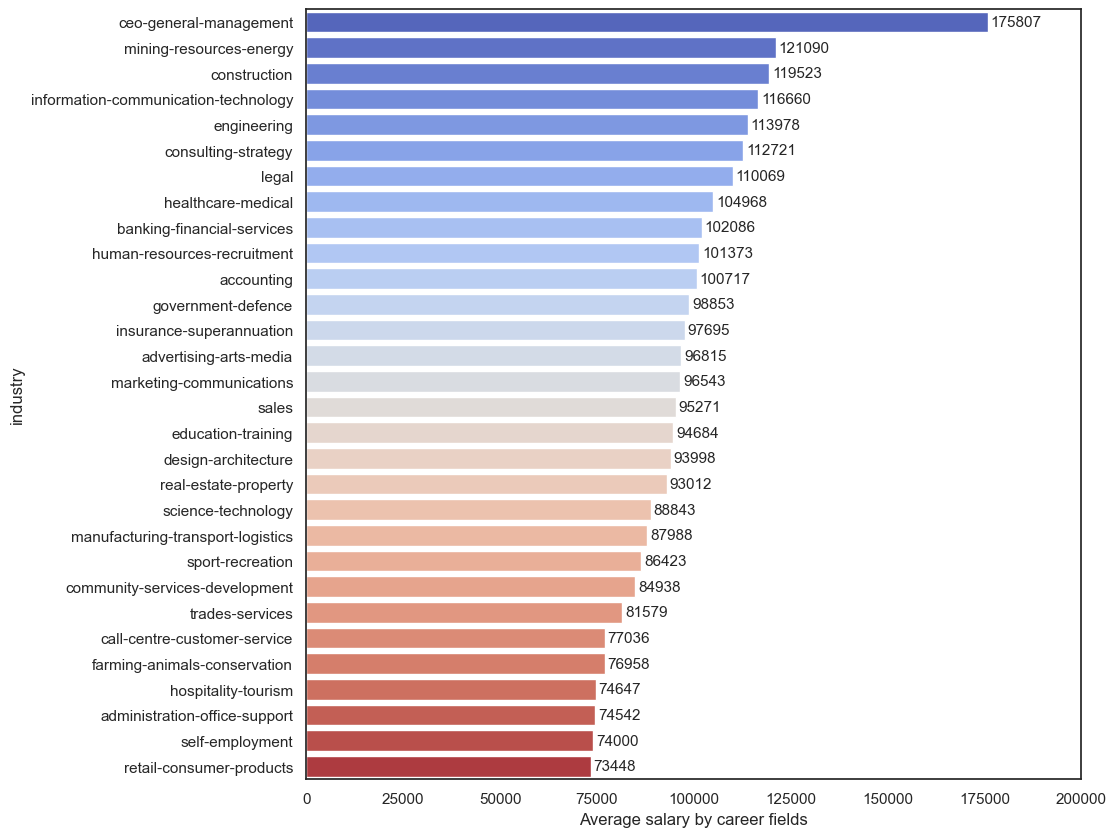

In [97]:
fig, ax = plt.subplots(figsize=(10, 10))
#ax.axvline(x = 10, linestyle = '--', color ='black', alpha = 0.2)
ax = sns.barplot(jobOverview, x = "medianSalary", y = "industry",errorbar = None, 
            order = jobOverview.groupby(by="industry").medianSalary.mean().sort_values(ascending = False).index,
            palette = 'coolwarm')

max_val = jobOverview.groupby(by="industry").medianSalary.mean().max()
# ax.figure.colorbar(mappable = cm.ScalarMappable(cmap="coolwarm", 
#                                                 norm = plt.Normalize(-1.2, max_val)),
#                     cmap = "coolwarm",
#                     ax = ax)
# def to_format(num):
#     return "{:.0f}k".format(round(num, -3))

# number 

ax.bar_label(ax.containers[0], fmt = '%.f',padding =2, fontsize = 11)
ax.set_xlim(0,200000)
ax.set_xlabel("Average salary by career fields")


> This plot indicates the average of median salary by career fields. As can be seen from the plot, "CEO-management" has the highest average salary, far higher than the field at 2nd place. This is not surprising since management tends to have higher salary in general, regardless of the industry. ICT ranks 4th among 30 fields.

> Overall, we have seen the overview of the job market in Australia, and observed the potentials of Information Communication Technology fields in the present and in the future. 

#### ii. Review Statistics for IT

In [36]:
reviewStats

,Unnamed: 0,alias,total,remuneration,employability,jobSatisfaction,workLifeBalance,diversityInTasks,careerProgressionOpportunities,__typename
0,0,insolvency-manager,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,payroll-adviser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,taxation-manager,1.0,3.0,3.0,1.0,4.0,3.0,1.0,RoleReviewStats
3,3,taxation-consultant,17.0,3.2,3.3,4.1,4.3,3.5,3.7,RoleReviewStats
4,4,audit-supervisor,2.0,3.5,4.0,5.0,4.0,4.0,5.0,RoleReviewStats
...,...,...,...,...,...,...,...,...,...,...
2575,2575,general-hand,29.0,3.6,3.7,4.0,4.2,4.1,3.3,RoleReviewStats
2576,2576,maintenance-manager,61.0,3.6,3.9,4.0,3.7,4.1,3.5,RoleReviewStats
2577,2577,furniture-removalist,14.0,3.0,3.4,3.9,3.1,4.0,3.0,RoleReviewStats
2578,2578,engineering-technician,3.0,4.0,4.7,4.7,5.0,4.7,4.0,RoleReviewStats


Displaying column names

In [37]:
reviewStats.columns

Index(['Unnamed: 0', 'alias', 'total', 'remuneration', 'employability',
       'jobSatisfaction', 'workLifeBalance', 'diversityInTasks',
       'careerProgressionOpportunities', '__typename'],
      dtype='object')

Dropping unnecessary columns

In [38]:
reviewStats_droppedcols = ['Unnamed: 0', '__typename']

In [39]:
reviewStats.drop(reviewStats_droppedcols, axis = 1, inplace = True)

Data after dropping columns

In [40]:
reviewStats

,alias,total,remuneration,employability,jobSatisfaction,workLifeBalance,diversityInTasks,careerProgressionOpportunities
0,insolvency-manager,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,payroll-adviser,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,taxation-manager,1.0,3.0,3.0,1.0,4.0,3.0,1.0
3,taxation-consultant,17.0,3.2,3.3,4.1,4.3,3.5,3.7
4,audit-supervisor,2.0,3.5,4.0,5.0,4.0,4.0,5.0
...,...,...,...,...,...,...,...,...
2575,general-hand,29.0,3.6,3.7,4.0,4.2,4.1,3.3
2576,maintenance-manager,61.0,3.6,3.9,4.0,3.7,4.1,3.5
2577,furniture-removalist,14.0,3.0,3.4,3.9,3.1,4.0,3.0
2578,engineering-technician,3.0,4.0,4.7,4.7,5.0,4.7,4.0


Remove duplicates

In [41]:
reviewStats.drop_duplicates(inplace = True)

Merging table, only keeping ICT related titles

In [43]:
itJobs = jobOverview[jobOverview["industry"] == "information-communication-technology"]

In [44]:
itJobStats = itJobs.merge(reviewStats, on ='alias')

In [45]:
itJobStats

,alias,title,industry,minSalary,maxSalary,lowerAverageSalary,upperAverageSalary,medianSalary,jobStatisfaction,growth,total,remuneration,employability,jobSatisfaction,workLifeBalance,diversityInTasks,careerProgressionOpportunities
0,network-specialist,Network Specialist,information-communication-technology,100000.0,130000.0,110000.0,120000.0,110000.0,3.5,NaN,2.0,3.5,3.5,3.5,3.5,3.5,3.0
1,database-developer,Database Developer,information-communication-technology,75000.0,135000.0,95000.0,115000.0,105000.0,4.0,38.9,1.0,4.0,4.0,4.0,4.0,3.0,4.0
2,functional-specialist,Functional Specialist,information-communication-technology,105000.0,165000.0,125000.0,145000.0,136000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,solutions-developer,Solutions Developer,information-communication-technology,80000.0,140000.0,100000.0,120000.0,102500.0,3.5,NaN,2.0,2.5,3.0,3.5,4.0,3.0,2.5
4,game-developer,Game Developer,information-communication-technology,70000.0,130000.0,90000.0,110000.0,99999.0,4.5,13.7,2.0,4.5,3.5,4.5,4.0,4.5,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,campaign-analyst,Campaign Analyst,information-communication-technology,80000.0,140000.0,100000.0,120000.0,107499.0,4.0,NaN,1.0,3.0,4.0,4.0,5.0,4.0,4.0
298,service-director,Service Director,information-communication-technology,160000.0,220000.0,180000.0,200000.0,188041.0,4.7,NaN,3.0,4.0,4.7,4.7,3.7,4.7,4.3
299,operations-engineer,Operations Engineer,information-communication-technology,90000.0,150000.0,110000.0,130000.0,120755.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,design-team-leader,Design Team Leader,information-communication-technology,80000.0,140000.0,100000.0,120000.0,109999.0,4.0,NaN,1.0,4.0,4.0,4.0,4.0,4.0,4.0


/Users/kyphongmai/Documents/Projects/Webscraping/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


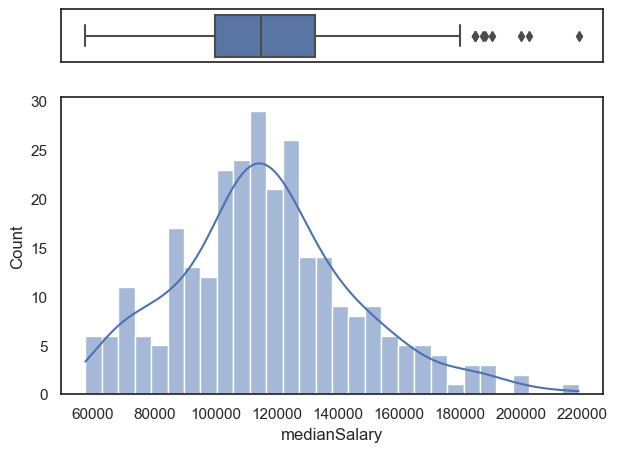

In [46]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (7,5))
sns.boxplot(data = itJobStats, x = "medianSalary", ax = ax_box)

sns.histplot(data = itJobStats, x = "medianSalary",bins = 30, kde = True, ax = ax_hist)
ax_box.set(xlabel='')
plt.show()

In [47]:
low_paying_jobs = itJobStats.sort_values(by = "medianSalary")[:10].sort_values(by="medianSalary", ascending = False)

In [48]:
high_paying_jobs = itJobStats.sort_values(by="medianSalary", ascending = False)[:10]

~~~
Key highlights about salary of ICT professionals
~~~

Text(0, 0.5, 'job title')

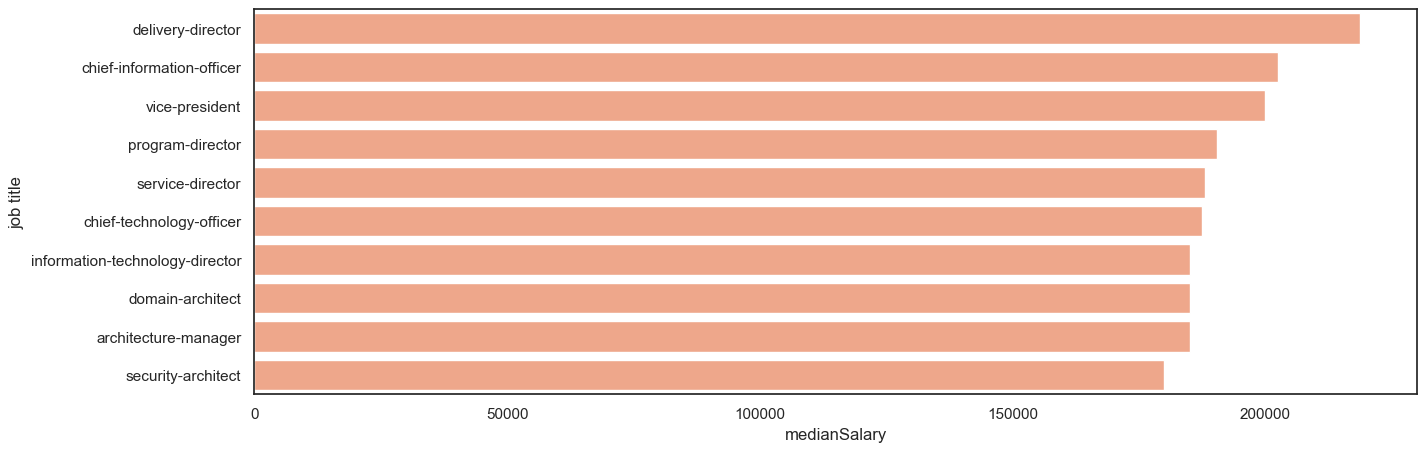

In [93]:
fig, ax = plt.subplots(figsize = (15,5))
sns.barplot(data = high_paying_jobs, y = "alias", x = "medianSalary", color = 'lightsalmon')
ax.set_xlim(left = 0, right = 230000)
ax.set_ylabel ("job title")

> Plot shows jobs with highest salary in ICT. The commonality is that most of the jobs are related to director or C-level, or highly technical positions, which is expected

Text(0, 0.5, 'job title')

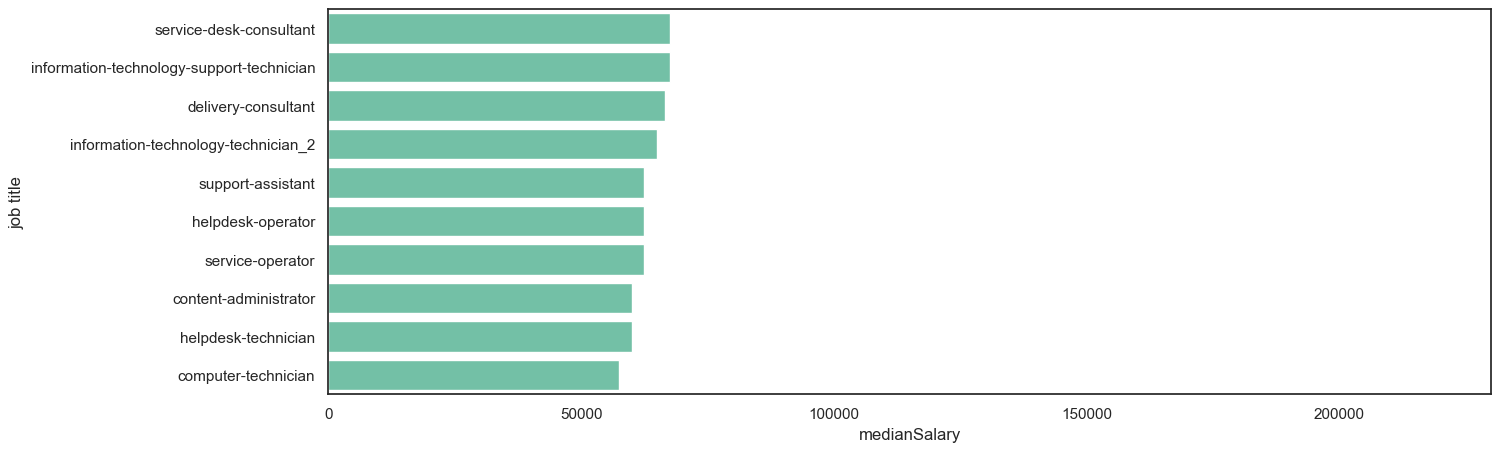

In [94]:
fig, ax = plt.subplots(figsize = (15,5))
sns.barplot(data = low_paying_jobs, y = "alias", x = "medianSalary", color = 'mediumaquamarine')
ax.set_xlim(left = 0, right = 230000)
ax.set_ylabel ("job title")

> The plot shows job with lowest salary in ICT. We can observe that these jobs tend to be quite general and usually do not require higher degree or qualifications. Usually they are support roles or help desk roles, or technician roles.

Below are some extra steps and functions created to assist the visualisation of the next plot.

In [51]:
itJobStats_cleaned = itJobStats.copy()

Divide the graph into 4 quadrants:
- high salary and high job satisfaction (>4 star rating) 
- high salary and low job satisfaction
- low salary and high job satisfaction
- low salary and low job satisfaction


In [52]:
def classify(row):
    if row['medianSalary'] >= 115000:
        if row['jobSatisfaction'] >= 4:
            return "Desirable"
        else:
            return "Unfulfilling"
    else:
        if row['jobSatisfaction'] >=4:
            return "Passionate"
        else:
            return "Unrewarding"

In [53]:
itJobStats_cleaned['quadrants'] = itJobStats_cleaned.apply(classify, axis = 1)

Since the rating range for work life balance is very small, from 1 to 5. I use the following trick to scale up the difference between the work life balance score (this is only for visual effects)

In [55]:
itJobStats_cleaned['workLifeBalance'] = itJobStats_cleaned['workLifeBalance']**10

In [57]:
itJobStats_cleaned_with_names = itJobStats_cleaned.copy()

In [59]:
itJobStats_cleaned_with_names

,alias,title,industry,minSalary,maxSalary,lowerAverageSalary,upperAverageSalary,medianSalary,jobStatisfaction,growth,total,remuneration,employability,jobSatisfaction,workLifeBalance,diversityInTasks,careerProgressionOpportunities,quadrants
0,network-specialist,Network Specialist,information-communication-technology,100000.0,130000.0,110000.0,120000.0,110000.0,3.5,NaN,2.0,3.5,3.5,3.5,2.758547e+05,3.5,3.0,Unrewarding
1,database-developer,Database Developer,information-communication-technology,75000.0,135000.0,95000.0,115000.0,105000.0,4.0,38.9,1.0,4.0,4.0,4.0,1.048576e+06,3.0,4.0,Passionate
2,functional-specialist,Functional Specialist,information-communication-technology,105000.0,165000.0,125000.0,145000.0,136000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unfulfilling
3,solutions-developer,Solutions Developer,information-communication-technology,80000.0,140000.0,100000.0,120000.0,102500.0,3.5,NaN,2.0,2.5,3.0,3.5,1.048576e+06,3.0,2.5,Unrewarding
4,game-developer,Game Developer,information-communication-technology,70000.0,130000.0,90000.0,110000.0,99999.0,4.5,13.7,2.0,4.5,3.5,4.5,1.048576e+06,4.5,4.0,Passionate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,campaign-analyst,Campaign Analyst,information-communication-technology,80000.0,140000.0,100000.0,120000.0,107499.0,4.0,NaN,1.0,3.0,4.0,4.0,9.765625e+06,4.0,4.0,Passionate
298,service-director,Service Director,information-communication-technology,160000.0,220000.0,180000.0,200000.0,188041.0,4.7,NaN,3.0,4.0,4.7,4.7,4.808584e+05,4.7,4.3,Desirable
299,operations-engineer,Operations Engineer,information-communication-technology,90000.0,150000.0,110000.0,130000.0,120755.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unfulfilling
300,design-team-leader,Design Team Leader,information-communication-technology,80000.0,140000.0,100000.0,120000.0,109999.0,4.0,NaN,1.0,4.0,4.0,4.0,1.048576e+06,4.0,4.0,Passionate


Dropping NA

In [60]:
itJobStats_cleaned_with_names.dropna(inplace = True)

Functions assisting visualisation, including a list of jobs that I want to highlight in the plot

In [61]:
def add_job_name(job_names: list):
    
    # Iterate over each country name
    for job_name in job_names:
        
        # Find position of the country on the axes
        x_axis=itJobStats_cleaned_with_names.loc[itJobStats_cleaned_with_names['title']== job_name, "jobSatisfaction"]
        y_axis= itJobStats_cleaned_with_names.loc[itJobStats_cleaned_with_names['title']== job_name, "medianSalary"]
        
        # Add the text at the right position, slighly shift to the top for lisibility
        ax.text(x_axis-0.1, y_axis+4000, # position
                job_name, # label
                size=8,
                #backgroundcolor = "white" # size of the text, # align the text
               )
highlight_jobs = ['Software Architect', 'Presales Consultant', 'Technical Lead', 'Systems Architect',
                'IT Technician', 'Business Intelligence Analyst', 'Business Analyst',
                'Backend Developer', 'Chief Technology Officer', 'Technical Business Analyst', 'Data Manager',
                'SQL Developer', 'Data Analyst', 'Web Designer','Support Technician','Data Officer']

def highlighting_rows(row):
    if row['title'] in highlight_jobs:
        return "black"
    else:
        return "None"


itJobStats_cleaned_with_names['edgecolor'] = itJobStats_cleaned_with_names.apply(highlighting_rows, axis =1)




~~~
Key highlights
~~~

/Users/kyphongmai/Documents/Projects/Webscraping/.conda/lib/python3.11/site-packages/matplotlib/text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/Users/kyphongmai/Documents/Projects/Webscraping/.conda/lib/python3.11/site-packages/matplotlib/text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
/Users/kyphongmai/Documents/Projects/Webscraping/.conda/lib/python3.11/site-packages/matplotlib/text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/Users/kyphongmai/Documents/Projects/Webscraping/.conda/lib/python3.11/site-packages/matplotlib/text.py:895: Fut

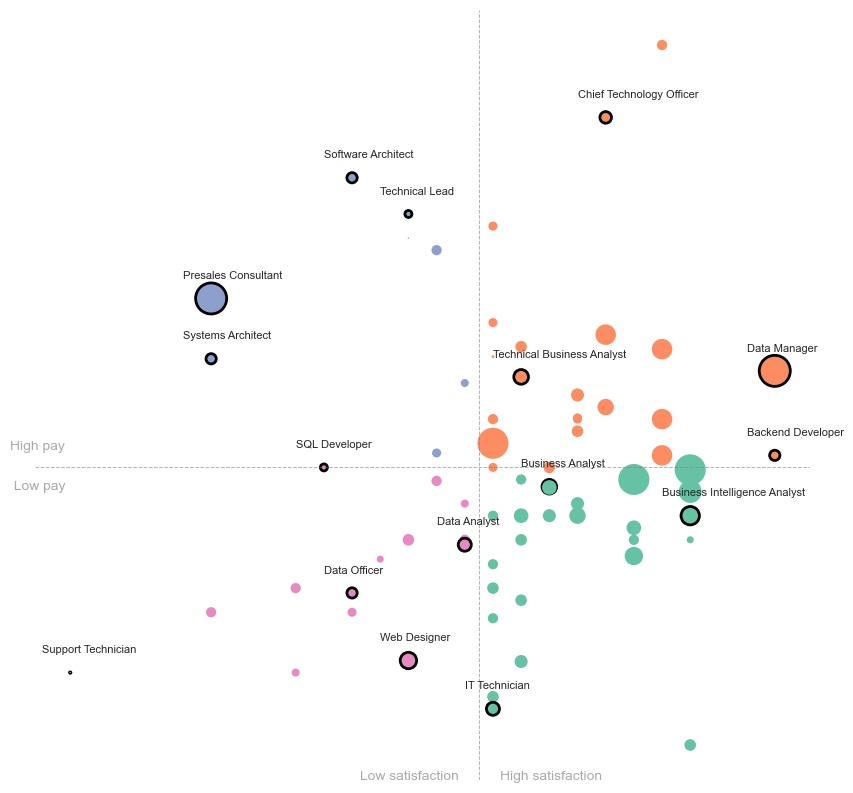

In [96]:
fig,ax = plt.subplots(figsize = (10,10))
sns.scatterplot(itJobStats_cleaned_with_names, y = "medianSalary", x = "jobSatisfaction", size = "workLifeBalance", 
                hue = "quadrants", marker='o', sizes = (1,500),legend = False,
                edgecolor = itJobStats_cleaned_with_names['edgecolor'],
                linewidth = 2,
                palette = "Set2"
                )
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.axis('off')
ax.tick_params(axis='both', which='both', length=0)

add_job_name(highlight_jobs)

ax.axvline(3.95, color='gray', linestyle='--', linewidth=0.7, alpha=0.6)
ax.axhline(115000, color='gray', linestyle='--', linewidth=0.7, alpha=0.6)

fig.text(0.1,0.44,
        'High pay',
        color = "darkgrey",
        size=10)
fig.text(0.1,0.4,
        ' Low pay',
        color = "darkgrey",
        size=10)

fig.text(0.59, 0.11,
         'High satisfaction',
         color = 'darkgrey',
         size = 10)

fig.text(0.45, 0.11,
         'Low satisfaction',
         color = 'darkgrey',
         size = 10)

plt.show()

> The plot is divided into 4 quadrants. 
> - The upper right corner contains jobs with high satisfaction and high salary: These jobs tend to be technical and managerial such as CTO or Data manager. This is considered as the desirable region.
> - The upper left corner contains jobs with low satisfaction but high salary: These jobs tend to be highly technical and may belong to middle management, such as Software Architect or Technical Lead. This might be considered as Unfulling region. Because even though highly paid, people in these roles aren't entirely happy with their jobs
> - The lower right corner contains jobs with high satisfaction but low pay: These jobs tend to be somewhat technical and not related to management, such as Business Analyst and BI analyst. These jobs are likely to be interesting. 
> - The lower left corner contains jobs with low satisfaction and low pay. These jobs might be involved with management, and might requires tedious tasks, which makes it less satisfying. We could categorise this region to be undesirable.

~~~
Note that the threshold for high satisfaction is based on the 4 stars and above rating in SEEK.com, and high pay range starts at 115K per year. Depending on the choice of these thresholds we might obtain vastly different plots. 
~~~

> Size of the bubble is an indicator of another metric: self rated Work Life Balance. The bigger the bubble, the more work-life balance the job is, according to the raters. We can see the correlation between the satisfaction with work life balance. The left region contains more small-size bubbles while most of the large bubbles are distributed in the right region, region of high satisfaction. 

~~~
Note that metrics such as job satisfaction and work life balance can be biased as they are rated by a limited number of users from SEEK. Consideration needs to be made before making any conclusion. It will not reflect the whole picture of IT professions but it gives us a rough idea. 
~~~

#### iii. Skill Requirements for IT professionals

In [69]:
specReqs

,Unnamed: 0,type,label,alias
0,0,Referenceable Experience,Insolvency,insolvency-manager
1,1,Referenceable Experience,Restructuring,insolvency-manager
2,2,Observable Attributes,Assertive Communication,insolvency-manager
3,3,Referenceable Experience,Relationship Management,insolvency-manager
4,4,Referenceable Experience,Public Practice Accounting,insolvency-manager
...,...,...,...,...
45301,45301,Observable Attributes,Ability to Work At A Fast Pace,general-hand
45302,45302,Observable Attributes,Communication Skills,general-hand
45303,45303,Observable Attributes,Resilience,general-hand
45304,45304,Observable Attributes,Computer Literacy,general-hand


Dropping unnecessary columns


In [70]:
specReqs.drop(['Unnamed: 0'], axis = 1, inplace = True)

Merging with Statistics Table for ICT jobs


In [71]:
iT_reqs = itJobStats_cleaned.merge(specReqs, on="alias")

In [72]:
iT_reqs

,alias,title,industry,minSalary,maxSalary,lowerAverageSalary,upperAverageSalary,medianSalary,jobStatisfaction,growth,total,remuneration,employability,jobSatisfaction,workLifeBalance,diversityInTasks,careerProgressionOpportunities,quadrants,type,label
0,network-specialist,Network Specialist,information-communication-technology,100000.0,130000.0,110000.0,120000.0,110000.0,3.5,NaN,2.0,3.5,3.5,3.5,2.758547e+05,3.5,3.0,Unrewarding,Referenceable Experience,Cisco Technologies
1,network-specialist,Network Specialist,information-communication-technology,100000.0,130000.0,110000.0,120000.0,110000.0,3.5,NaN,2.0,3.5,3.5,3.5,2.758547e+05,3.5,3.0,Unrewarding,Referenceable Experience,Firewalls
2,network-specialist,Network Specialist,information-communication-technology,100000.0,130000.0,110000.0,120000.0,110000.0,3.5,NaN,2.0,3.5,3.5,3.5,2.758547e+05,3.5,3.0,Unrewarding,Referenceable Experience,Switching
3,network-specialist,Network Specialist,information-communication-technology,100000.0,130000.0,110000.0,120000.0,110000.0,3.5,NaN,2.0,3.5,3.5,3.5,2.758547e+05,3.5,3.0,Unrewarding,Referenceable Experience,Routing
4,network-specialist,Network Specialist,information-communication-technology,100000.0,130000.0,110000.0,120000.0,110000.0,3.5,NaN,2.0,3.5,3.5,3.5,2.758547e+05,3.5,3.0,Unrewarding,Referenceable Experience,Load Balancing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990,technical-manager,Technical Manager,information-communication-technology,110000.0,170000.0,130000.0,150000.0,139886.0,4.2,NaN,5.0,4.2,4.0,4.2,1.048576e+06,3.8,4.0,Desirable,Observable Attributes,Computer Literacy
6991,technical-manager,Technical Manager,information-communication-technology,110000.0,170000.0,130000.0,150000.0,139886.0,4.2,NaN,5.0,4.2,4.0,4.2,1.048576e+06,3.8,4.0,Desirable,Observable Attributes,Time Management
6992,technical-manager,Technical Manager,information-communication-technology,110000.0,170000.0,130000.0,150000.0,139886.0,4.2,NaN,5.0,4.2,4.0,4.2,1.048576e+06,3.8,4.0,Desirable,Observable Attributes,Organised
6993,technical-manager,Technical Manager,information-communication-technology,110000.0,170000.0,130000.0,150000.0,139886.0,4.2,NaN,5.0,4.2,4.0,4.2,1.048576e+06,3.8,4.0,Desirable,Observable Attributes,Thoroughness


15 most important skills for IT 


In [73]:
iT_top15_skills = iT_reqs.groupby(by=["label","type"]).alias.count().sort_values(ascending = False).head(15).reset_index()

In [74]:
iT_top15_skills

,label,type,alias
0,Communication Skills,Observable Attributes,164
1,Problem Solving,Observable Attributes,143
2,Microsoft Azure,Referenceable Experience,115
3,Time Management,Observable Attributes,107
4,Computer Science,Referenceable Experience,103
5,SQL Query Language,Referenceable Experience,94
6,Information Technology,Referenceable Experience,90
7,Customer Service,Referenceable Experience,77
8,Organised,Observable Attributes,77
9,Autonomy,Observable Attributes,76


In [75]:
iT_reqs_q1 = iT_reqs[iT_reqs['quadrants'] == "Unfulfilling"].groupby(by=["label","type"]).alias.count().sort_values(ascending = False).head(10).reset_index()
iT_reqs_q2 = iT_reqs[iT_reqs['quadrants'] == "Desirable"].groupby(by=["label","type"]).alias.count().sort_values(ascending = False).head(10).reset_index()
iT_reqs_q3 = iT_reqs[iT_reqs['quadrants'] == "Passionate"].groupby(by=["label","type"]).alias.count().sort_values(ascending = False).head(10).reset_index()
iT_reqs_q4 = iT_reqs[iT_reqs['quadrants'] == "Unrewarding"].groupby(by=["label","type"]).alias.count().sort_values(ascending = False).head(10).reset_index()

~~~
Key highlights
~~~

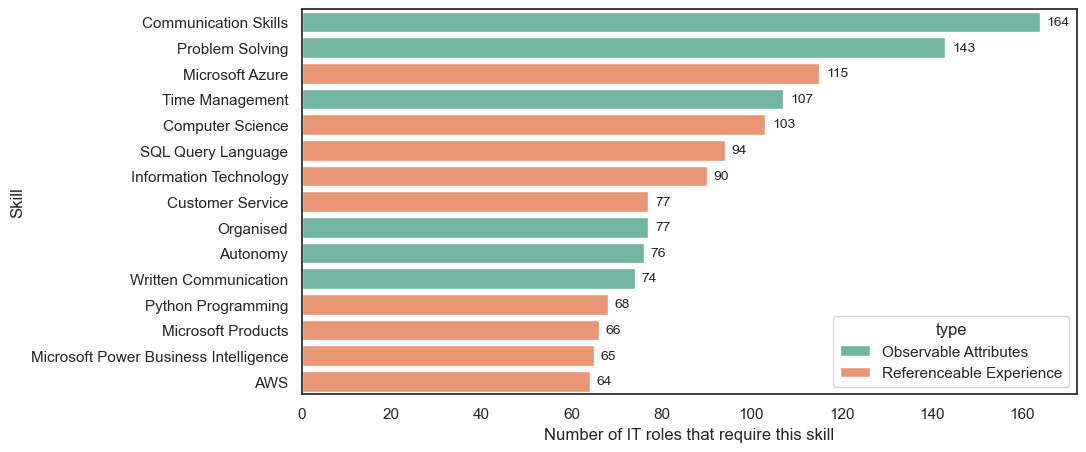

In [76]:
fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(data = iT_top15_skills, x = "alias", y = "label", hue = "type", dodge = False, palette = "Set2")

ax.bar_label(ax.containers[0], fmt = '%.f',padding =5, fontsize = 10)
ax.bar_label(ax.containers[1], fmt = '%.f',padding =5, fontsize = 10)
ax.set_xlabel("Number of IT roles that require this skill")
ax.set_ylabel("Skill")
plt.show()

> Contratory to popular belief, soft skills such as communication and problem solving skills are the most important skills for IT professionals. It is common believed that to be in ICT industry, technical skills related to software and programming are the most important ones. However, observable attributes play a crucial roles in determine one's success in any professions, including ICT. 

> Notably, cloud computing such as MS Azure seem to be the most important technical skills, surpassing AWS. This might be an indicator that Azure is dominating the market. 

> Technical skills such as SQL, Python and Power BI are also very crucial skill sets that IT professionals should be familiar with. These skills provide strong foundations for Data Analyst roles.

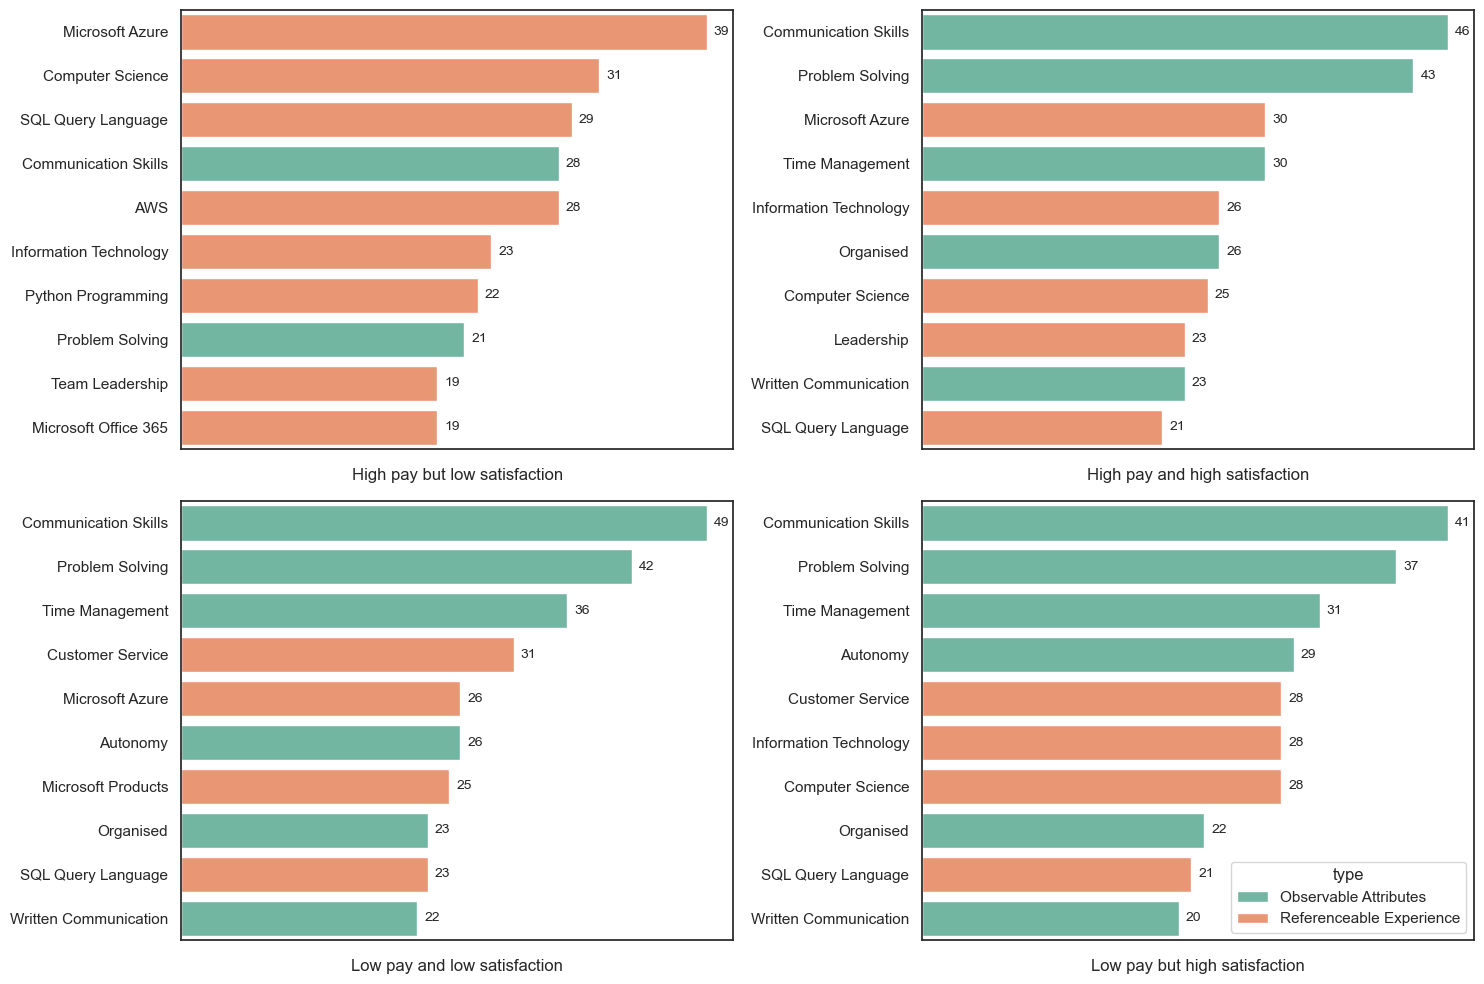

In [77]:
fig, ax = plt.subplots(nrows =2,ncols =2, figsize = (15,10))


sns.barplot(data = iT_reqs_q1, x = "alias", y = "label", hue = "type", hue_order = ['Observable Attributes','Referenceable Experience'], dodge = False, palette = "Set2",
            ax = ax[0,0])
ax[0,0].bar_label(ax[0,0].containers[0], fmt = '%.f',padding =5, fontsize = 10)
ax[0,0].bar_label(ax[0,0].containers[1], fmt = '%.f',padding =5, fontsize = 10)
ax[0,0].set_xlabel("High pay but low satisfaction")
ax[0,0].set_ylabel("")
ax[0,0].get_legend().set_visible(False)
ax[0,0].set_xticklabels([])

sns.barplot(data = iT_reqs_q2, x = "alias", y = "label", hue = "type",hue_order = ['Observable Attributes','Referenceable Experience'],dodge = False, palette = "Set2",
            ax = ax[0,1])
ax[0,1].bar_label(ax[0,1].containers[0], fmt = '%.f',padding =5, fontsize = 10)
ax[0,1].bar_label(ax[0,1].containers[1], fmt = '%.f',padding =5, fontsize = 10)
ax[0,1].set_xlabel("High pay and high satisfaction")
ax[0,1].set_ylabel("")
ax[0,1].get_legend().set_visible(False)
ax[0,1].set_xticklabels([])

sns.barplot(data = iT_reqs_q4, x = "alias", y = "label", hue = "type",hue_order = ['Observable Attributes','Referenceable Experience'], dodge = False, palette = "Set2",
            ax = ax[1,0])
ax[1,0].bar_label(ax[1,0].containers[0], fmt = '%.f',padding =5, fontsize = 10)
ax[1,0].bar_label(ax[1,0].containers[1], fmt = '%.f',padding =5, fontsize = 10)
ax[1,0].set_xlabel("Low pay and low satisfaction")
ax[1,0].set_ylabel("")
ax[1,0].get_legend().set_visible(False)
ax[1,0].set_xticklabels([])

sns.barplot(data = iT_reqs_q3, x = "alias", y = "label", hue = "type",hue_order = ['Observable Attributes','Referenceable Experience'], dodge = False, palette = "Set2",
            ax = ax[1,1])
ax[1,1].bar_label(ax[1,1].containers[0], fmt = '%.f',padding =5, fontsize = 10)
ax[1,1].bar_label(ax[1,1].containers[1], fmt = '%.f',padding =5, fontsize = 10)
ax[1,1].set_xlabel("Low pay but high satisfaction")
ax[1,1].set_ylabel("")
ax[1,1].set_xticklabels([])

fig.tight_layout()
plt.show()

> The position of 4 subplots match with the position of the 4 quadrants in the bubble plot earlier. In 3 out of 4 categories, Communication and problem solving skills are the most important skills. However, in the high pay low satisfaction category, the important skills are mostly technical. This is expected because if we look back at the bubble plot, we can see that jobs in this category requires a great deal of technical skills (eg. software architect). However, communication and problem solving skills still appear in top 10, indicating its importance. 

> SQL is a crucial skill that appears across 4 categories! Hence, it is defitely the skills that almost everyone in this industry need to master, or at least be familiar with!!!


#### iv. DA job distribution (Bonus)

In [78]:
jobCounts

,Unnamed: 0,title,location,work_type,job counts
0,0,Taxation Consultant,New South Wales NSW,Full time,100
1,1,Insolvency Manager,New South Wales NSW,Full time,100
2,2,Account Administration Assistant,New South Wales NSW,Full time,116
3,3,Tax Agent,New South Wales NSW,Full time,429
4,4,Payroll Adviser,New South Wales NSW,Full time,100
...,...,...,...,...,...
82454,82454,Retail Executive,Northern Territory NT,Casual/Vacation,8
82455,82455,Retail Executive,Australian Capital Territory ACT,Full time,100
82456,82456,Retail Executive,Australian Capital Territory ACT,Part time,17
82457,82457,Retail Executive,Australian Capital Territory ACT,Contract/Temp,3


Dropping columns


In [79]:
jobCounts.drop("Unnamed: 0", axis = 1, inplace = True)

In [80]:
DA_count = jobCounts[jobCounts["title"] == "Data Analyst"]

In [81]:
DA_count

,title,location,work_type,job counts
48459,Data Analyst,New South Wales NSW,Full time,2544
48469,Data Analyst,New South Wales NSW,Part time,57
48477,Data Analyst,New South Wales NSW,Contract/Temp,541
48493,Data Analyst,New South Wales NSW,Casual/Vacation,35
48504,Data Analyst,Victoria VIC,Full time,1915
48516,Data Analyst,Victoria VIC,Part time,84
48528,Data Analyst,Victoria VIC,Contract/Temp,430
48539,Data Analyst,Victoria VIC,Casual/Vacation,17
48551,Data Analyst,Queensland QLD,Full time,1250
48562,Data Analyst,Queensland QLD,Part time,53


In [86]:
DA_worktype = DA_count.groupby(by ="work_type").aggregate({'job counts':'sum'})

In [87]:
DA_worktype.sort_values(by = "job counts", inplace = True)

In [88]:
DA_worktype['percent'] = DA_worktype['job counts']/(DA_worktype['job counts'].sum())*100

Distribution of work type for Data Analyst Roles (in percentage)

In [89]:
DA_worktype

,job counts,percent
work_type,,
Casual/Vacation,103,1.132490
Part time,246,2.704783
Contract/Temp,1738,19.109401
Full time,7008,77.053326


In [90]:
DA_count['location'] = DA_count['location'].str[-3:]

/var/folders/8l/kkszpn6n73q11pl793xr82gh0000gn/T/ipykernel_21415/3572268548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DA_count['location'] = DA_count['location'].str[-3:]


~~~
Key Highlight
~~~


Text(0.5, 1.0, 'Distribution of Data Analyst jobs across work types')

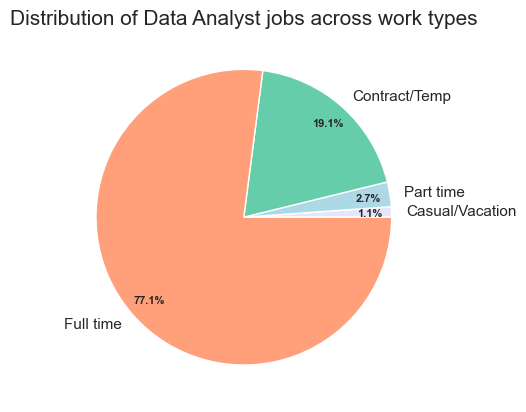

In [91]:
fig,ax = plt.subplots()
colors = ["lavender", "lightblue","mediumaquamarine", "lightsalmon"]
_,__,autotexts = plt.pie (DA_worktype['percent'], labels = DA_worktype['job counts'].index, colors = colors, autopct ='%1.1f%%', pctdistance = 0.85)
plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Distribution of Data Analyst jobs across work types", fontsize = 15)

> Most DA jobs are either full time or contact. With full-time being dominated at 77.1%. Part time and casual roles only account for a very small percentage of all the DA roles. This indicates that usually DA roles are quite important to their company and organisations and tend to require training and understanding of business's need and commitment. This trend might not observed for roles such as customer services or retails or full time commitment is not usually needed. 

Text(0.5, 1.0, 'Distribution of DA jobs in Australia')

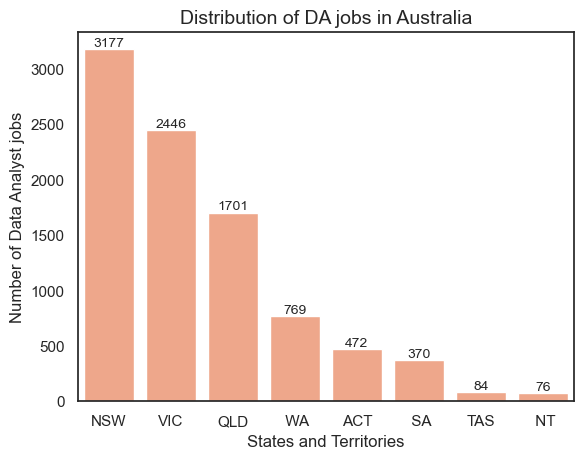

In [95]:
fig,ax = plt.subplots()
sns.barplot(data = DA_count, x = "location", y = "job counts", estimator= 'sum', errorbar = None, color = "lightsalmon",
            order = ['NSW', 'VIC', 'QLD', ' WA', 'ACT', ' SA', 'TAS', ' NT'])
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_xlabel("States and Territories")
ax.set_ylabel("Number of Data Analyst jobs")
ax.set_title("Distribution of DA jobs in Australia", fontsize = 14)


> This data is collected early May 2024 and shows the number of available DA jobs by states and territories. It is clear that NSW, VIC and QLD, where metropolitan cities are located, have the highest demand in Data Analyst. Please note that the number reported here is based on the results returned by SEEK when candidate inputs Data Analyst into their search bar. Therefore, it might include jobs that are also closely related to DA, such as BA, BI, Data Engineer or Data Scientist. 

### Conclusion


Some key takeaways from the report includes:
- ICT is still a very promising career, having the higest career prospect in the next 5 years
- Focus our target on finding jobs within the desirable area (high pay and high satisfaction)
- Soft skill is as important as technical skills for IT professionals, and in some cases, they are even more important
- Technical skills such as Python, SQL, Power BI is highly sought after
- States with metropolitan cities (NWS, VIC, QLD) have significantly higher number of jobs for DA